In [53]:
# Si importano le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Si fa la connessione a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Si carica il dataframe
file_path = '/content/drive/MyDrive/primofile.csv'
df = pd.read_csv(file_path)
data = pd.read_csv(file_path)


In [56]:
# Si vuole preparare il dataset da utilizzare per il modello di machine learning, quindi si eseguono operazioni di preprocessing sui dati

# Si creano le variabili dummy, questo permette di traformare le variabili categoriche in variabili numeriche
one_hot_industry = pd.get_dummies(df['Industry Sector'], prefix='industry')
one_hot_country = pd.get_dummies(df['Countries'], prefix='country')
one_hot_local = pd.get_dummies(df['Local'], prefix='local')
one_hot_potential = pd.get_dummies(df['Potential Accident Level'], prefix='potential')
one_hot_risco = pd.get_dummies(df['Risco Critico'], prefix='risco')
one_hot_genre = pd.get_dummies(df['Genre'], prefix='genre')
one_hot_employee = pd.get_dummies(df['Employee ou Terceiro'], prefix='employee')

# Si aggiungono le variabili dummies, create al passo precedente, al dataframe
df = pd.concat([df, one_hot_industry], axis=1)
df = pd.concat([df, one_hot_country], axis=1)
df = pd.concat([df, one_hot_local], axis=1)
df = pd.concat([df, one_hot_potential], axis=1)
df = pd.concat([df, one_hot_risco], axis=1)
df = pd.concat([df, one_hot_genre], axis=1)
df = pd.concat([df, one_hot_employee], axis=1)

# Si rimuovono le colonne originali e si mantengono solo le variabili dummies
df = df.drop(['Industry Sector'], axis='columns')
df = df.drop(['Countries'], axis='columns')
df = df.drop(['Local'], axis='columns')
df = df.drop(['Potential Accident Level'], axis='columns')
df = df.drop(['Risco Critico'], axis='columns')
df = df.drop(['Genre'], axis='columns')
df = df.drop(['Employee ou Terceiro'], axis='columns')


# Si separano le variabili target (Accident Level) e le caratteristiche (features) (X)
X = df.drop(['Accident Level','Data'], axis='columns')  # Features
y = df['Accident Level']                                # Target

# Si trasforma la colonna 'Accident Level' in dummy, se necessario
y = pd.get_dummies(y)

# Si importano le librerie necessarie per creare un algoritmo di Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Si creano il Training Set e il Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Il 20% dei dati sarà destinato al Test Set

# Si normalizzano i dati, per permettere una migliore performance, in particolare si usa il MinMaxScaler che normalizza i dati tra 0 e 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:
# Ora si vuole costruire e addestrare il modello di deep learning

# Si importano le librerie per riuscire a creare un modello di rete neurale
from keras.models import Sequential
from keras.layers import Dense, Input

# Si definisce il numero di classi per il nostro target (ossia 'Accident Level'), tale numero dipende dal numero di livelli di rischio
num_classes = y.shape[1]           # Si restituisce il numero di classi presenti nel target, ossia i livelli di rischio che in questo caso sono 5

input_shape = (X_train.shape[1],)  # Restituisce il numero di features del dataset di addestramento, permette di determinare la forma dell'input che la rete neurale si aspetta

# Si crea il modello con 2 strati nascosti
model = Sequential([
    Input(shape=input_shape),                 # Definisce il livello di input, con la forma delle caratteristiche definite prima
    Dense(100, activation="relu"),            # Primo strato nascosto con 100 neuroni e con funzione di attivazione ReLu
    Dense(100, activation="relu"),            # Secondo strato nascosto con 100 neuroni e con funzione di attivazione ReLu
    Dense(num_classes, activation="softmax")  # Strato di output, con num_classes neuroni, con softmax come funzione di attivazione, per la classificazione multi-classe
])

# Si fa un riepilogo del modello di rete neurale
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 100)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,005 (66.43 KB)

 Trainable params: 17,005 (66.43 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Si controlla la distribuzione delle classi nella variabile target
y_train.value_counts()

I      II     III    IV     V    
True   False  False  False  False    265
False  True   False  False  False     34
       False  False  True   False     23
              True   False  False     22
              False  False  True       7
Name: count, dtype: int64

In [59]:
# Si vogliono definire i pesi delle classi

# Si importa la libreria necessaria
from sklearn.utils import class_weight

# Si cercano le etichette uniche
unique_labels = df['Accident Level'].unique()

# Si calcolano i pesi delle classi
class_weights = class_weight.compute_class_weight(
    class_weight="balanced",                        # Si vuole che i pesi siano bilanciati
    classes=unique_labels,                          # Si vuole calcolare i pesi per tutte le classi
    y=df.loc[y_train.index, 'Accident Level']       # Sottoinsieme di etichette in base a y_train
)

# Si restituiscono i pesi trovati in un array che viene convertito dizionario
class_weights = dict(enumerate(class_weights))

# Si stampano i pesi trovati
print(class_weights)

{0: 0.26490566037735847, 1: 3.0521739130434784, 2: 3.190909090909091, 3: 2.0647058823529414, 4: 10.028571428571428}


In [60]:
# Si vuole compilare e addestrare il modello di rete neurale

# Compilazione del modello
model.compile(loss='categorical_crossentropy',   # Funzione di Loss per la classificazione multi-classe
              optimizer='adam')                  # Come otimizzatore si usa 'Adam'

# Si addestra il modello, quindi si applica il processo di ottimizzazione per un numero di epoche definite
history = model.fit(X_train, pd.get_dummies(y_train), epochs=100, validation_split=0.2, class_weight=class_weights)  # Il 20% dei dati del Training Set sarà usato per il Validation Set

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.5826 - val_loss: 1.5193
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6161 - val_loss: 1.5304
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5292 - val_loss: 1.5250
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2910 - val_loss: 1.4596
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2148 - val_loss: 1.4031
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3872 - val_loss: 1.3757
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2418 - val_loss: 1.2897
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0734 - val_loss: 1.2783
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0713 - val_loss: 1.2590
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9512 - val_loss: 1.1756
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0347 - val_loss: 1.2332
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9450 - val_loss: 1.1364


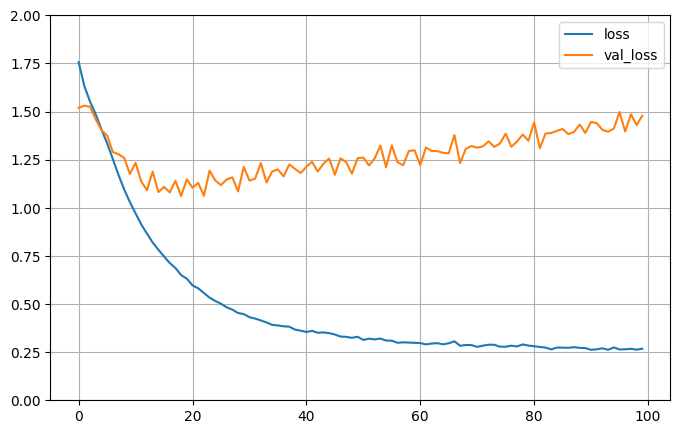

In [61]:
# Ora si vuole costruire il grafico per la visualizzazione dell'addestramento del modello
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)                                      # Permette di avere la griglia nel grafico
plt.gca().set_ylim(0, 2)                            # Si impostano i limiti dell'asse verticale
plt.show()

In [62]:
# Si vogliono fare predizioni e valutazioni sul modello di reti neurali creato sul set di dati del Test Set

# Si fanno previsioni sui dati di test
y_pred = model.predict(X_test)

# Poiché 'softmax' restituisce la probabilità, si prende l'indice della classe con la probabilità più alta
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

y_test_labels = np.argmax(y_test.values, axis=1)

# Si fa una valutazione del modello tramite la matrice di confusione e il report di classificazione
# Si importano le librerie necessarie
from sklearn.metrics import confusion_matrix, classification_report
print("\nMatrice di confusione\n")
print(confusion_matrix(y_test_labels, y_pred))
print("\nReport di classificazione\n")
print(classification_report(y_test_labels, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[1 2 3 0 3 2 0 1 1 0 0 0 1 4 1 0 1 0 0 0 3 0 0 4 0 2 0 0 0 2 3 0 0 2 0 0 0
 0 0 2 0 0 0 2 2 0 1 0 3 1 0 0 1 3 0 2 0 0 1 0 3 0 2 3 1 0 0 1 0 0 0 0 1 2
 3 0 0 1 0 0 0 2 1 2 0 0 0 0]

Matrice di confusione

[[45  7  6  5  0]
 [ 3  2  0  1  0]
 [ 1  5  2  1  0]
 [ 0  1  5  0  2]
 [ 0  0  0  2  0]]

Report di classificazione

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        63
           1       0.13      0.33      0.19         6
           2       0.15      0.22      0.18         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         2

    accuracy                           0.56        88
   macro avg       0.24      0.25      0.24        88
weighted avg       0.68      0.56      0.61        88



In [63]:
# Si vuole associare ad ogni settore e a ogni Risco Critico il livello di rischio predetto più frequente

data_test = data.iloc[y_test.index]  # Dal dataframe data si selezionano solo le righe che appartengono al Test Set
data_test['predicted_risk'] = y_pred  # Si aggiunge una nuova colonna al dataset "data" chiamata "predicted_risk"
print(data_test)

# Si vuole calcolare il valore di rischio predetto più frequente in base al settore industriale
sector_risk = data_test.groupby('Industry Sector')['predicted_risk'].agg(lambda x: x.mode()[0]) # Il metodo .agg() applica la funzione di aggregazione lambda che calcola la moda per la colonna "predicted_risk"

# Si stampa il risultato
print("\nI rischi predetti per ogni settore sono:\n")
print(sector_risk)


# Si vuole calcolare il valore di rischio predetto più frequente in base al Risco Critico
sector_risk_2 = data_test.groupby('Risco Critico')['predicted_risk'].agg(lambda x: x.mode()[0]) # Il metodo .agg() applica la funzione di aggregazione lambda che calcola la moda per la colonna "predicted_risk"

# Si stampa il risultato
print("\nI rischi per ogni tipologia di Risco critico sono:\n")
print(sector_risk_2)

                    Data   Countries     Local Industry Sector Accident Level  \
328  2017-02-04 00:00:00  Country_02  Local_02          Mining              I   
261  2016-10-29 00:00:00  Country_02  Local_08          Metals             IV   
168  2016-06-17 00:00:00  Country_02  Local_08          Metals              V   
142  2016-05-26 00:00:00  Country_03  Local_10          Others              I   
288  2016-12-15 00:00:00  Country_01  Local_03          Mining            III   
..                   ...         ...       ...             ...            ...   
91   2016-03-24 00:00:00  Country_03  Local_10          Others             IV   
17   2016-02-07 00:00:00  Country_01  Local_06          Metals              I   
366  2017-03-09 00:00:00  Country_02  Local_05          Metals              I   
340  2017-02-13 00:00:00  Country_02  Local_05          Metals              I   
76   2016-03-18 00:00:00  Country_02  Local_05          Metals              I   

    Potential Accident Leve

<ipython-input-63-37977d6366b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['predicted_risk'] = y_pred  # Si aggiunge una nuova colonna al dataset "data" chiamata "predicted_risk"
